Import All Library

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
pd.set_option('display.max_columns',3000000)
pd.set_option('display.max_rows',1500)
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

DataSet Import

In [2]:
df=pd.read_csv('/Users/avinashmagar/Documents/DataScience/python/Dataset/ZomatoRestaurantsIndia.csv')
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,NaN,1,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,0.0,1,-1


DataFrame Shape Check

In [3]:
df.shape

(211944, 26)

DataFrame Size Check

In [4]:
df.size

5510544

DataFrame Column Check

In [5]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

DataSet Info Check

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         207117 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

DataSet 7 & 5 Summary Check

In [7]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499475,77.615276,1.0,595.812229,1.882535,3.395937,378.002571,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781261,7.500104,0.0,606.239363,0.892989,1.283642,925.333106,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514181,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841214,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


DataSets Null Value Sum

In [8]:
df.isnull().sum()

res_id                       0
name                         0
establishment             4827
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                2069
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

DataSets null value percentage check

In [9]:
df.isnull().sum()/len(df)*100 # formula of calculate null value

res_id                   0.000000
name                     0.000000
establishment            2.277488
url                      0.000000
address                  0.063224
city                     0.000000
city_id                  0.000000
locality                 0.000000
latitude                 0.000000
longitude                0.000000
zipcode                 76.995338
country_id               0.000000
locality_verbose         0.000000
cuisines                 0.656305
timings                  1.827841
average_cost_for_two     0.000000
price_range              0.000000
currency                 0.000000
highlights               0.976201
aggregate_rating         0.000000
rating_text              0.000000
votes                    0.000000
photo_count              0.000000
opentable_support        0.022647
delivery                 0.000000
takeaway                 0.000000
dtype: float64

Here Check The Data Types Of all Column

In [10]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [11]:
df['currency'].value_counts()

currency
Rs.    211944
Name: count, dtype: int64

In [12]:
df_drop_currency = df.drop('currency', axis=1)

In [13]:
df_drop_zipcode=df.drop('zipcode',axis=1)

In [14]:
df['city'].value_counts()

city
Chennai          11630
Mumbai            6497
Bangalore         4971
Pune              4217
Lucknow           4121
Jabalpur          3994
New Delhi         3918
Jaipur            3713
Kochi             3370
Ajmer             3277
Ahmedabad         3162
Nagpur            2992
Goa               2992
Indore            2958
Coimbatore        2824
Surat             2713
Vadodara          2678
Bhopal            2656
Agra              2622
Guwahati          2622
Ludhiana          2618
Udaipur           2600
Dehradun          2577
Raipur            2568
Bhubaneshwar      2555
Patna             2547
Kanpur            2542
Jammu             2451
Jodhpur           2445
Puducherry        2424
Varanasi          2414
Kolkata           2361
Amritsar          2350
Meerut            2350
Vizag             2347
Nashik            2331
Jamshedpur        2301
Jalandhar         2291
Gwalior           2291
Trivandrum        2262
Ranchi            2262
Mysore            2241
Mangalore         2238
Kota  

In [15]:
df['establishment'].value_counts()

establishment
Quick Bites        64390
Casual Dining      61808
Café               22760
Bakery              8282
Dessert Parlour     7961
Bar                 6553
Fine Dining         6401
Sweet Shop          6103
Beverage Shop       5571
Dhaba               2939
Lounge              2761
Food Court          2722
Kiosk               1829
Bhojanalya          1400
Pub                 1396
Food Truck          1289
Microbrewery         866
Mess                 611
Paan Shop            521
Club                 340
Confectionery        306
Butcher Shop         170
Cocktail Bar          64
Shack                 44
Irani Cafe            24
Pop up                 6
Name: count, dtype: int64

In [16]:
df['establishment'].fillna(df['establishment'].mode()[0],inplace=True)

In [17]:
print(df['establishment'].isnull().sum())

0


In [18]:
df['timings'].value_counts()

timings
11 AM to 11 PM                                    26605
10 AM to 10 PM                                     5419
11 AM to 10 PM                                     4933
11 AM to 11 PM (Mon-Sun)                           4063
10 AM to 11 PM                                     3949
                                                  ...  
10:30 AM to 9 PM (Mon-Sat), Sun Closed                1
6pm – 11:30pm (Mon),6pm – 11pm (Tue-Sun)              1
12 Noon to 11:45 PM, 12 Midnight to 12:30 AM          1
1 PM to 12:30 AM (Mon-Sun)                            1
10am – 11pm (Mon-Wed),10:30am – 11pm (Thu-Sun)        1
Name: count, Length: 7740, dtype: int64

In [19]:
df['timings'].fillna(df['timings'].mode()[0],inplace=True)

In [20]:
print(df['timings'].isnull().sum())

0


In [21]:
print(df['url'].isnull().sum())

0


In [22]:
df['cuisines'].value_counts()

cuisines
North Indian                                                        15996
Fast Food                                                            6721
Cafe                                                                 6190
North Indian, Chinese                                                5820
South Indian                                                         5217
                                                                    ...  
Chinese, Mexican, Fast Food                                             1
South Indian, Andhra, Biryani, North Indian, Chinese                    1
Fast Food, Biryani, South Indian                                        1
Asian, Burger, Cafe, Chinese, Fast Food, Italian, Mexican, Pizza        1
Cafe, Italian, Mexican, Pizza                                           1
Name: count, Length: 9382, dtype: int64

In [23]:
df['cuisines'].fillna(df['cuisines'].mode()[0],inplace=True)

In [24]:
city_locality = df['city'] + ", " + df['locality']  # Combines with a comma and space
df['city_locality'] = city_locality

In [25]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,city_locality
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1,"Agra, Khandari"
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1,"Agra, Agra Cantt"
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1,"Agra, Shahganj"
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,0.0,1,-1,"Agra, Civil Lines"
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,NaN,1,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,0.0,1,-1,"Agra, Tajganj"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,Casual Dining,https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,390024,1,"Fatehgunj, Vadodara",North Indian,"11am – 3pm, 7pm – 11:30pm (Mon-Sun)",600,2,Rs.,"Dinner, Cash, Lunch, Delivery, Indoor Seating,...",4.1,Very Good,243,40,0.0,-1,-1,"Vadodara, Fatehgunj"
211940,3200996,Raju Omlet,Quick Bites,https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,NaN,1,"Karelibaug, Vadodara",Fast Food,"4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...",300,1,Rs.,"Dinner, Cash, Takeaway Available, Debit Card, ...",4.1,Very Good,187,40,0.0,1,-1,"Vadodara, Karelibaug"
211941,18984164,The Grand Thakar,Casual Dining,https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171164,NaN,1,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese","11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,Rs.,"Dinner, Cash, Debit Card, Lunch, Takeaway Avai...",4.0,Very Good,111,38,0.0,-1,-1,"Vadodara, Alkapuri"
211942,3201138,Subway,Quick Bites,https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,NaN,1,"Akota, Vadodara","Fast Food, Sandwich, Salad",8 AM to 1 AM,500,2,Rs.,"Dinner, Delivery, Credit Card, Lunch, Cash, Ta...",3.7,Good,128,34,0.0,1,-1,"Vadodara, Akota"


In [26]:
df.drop('address', axis=1, inplace=True)

In [27]:
df

,res_id,name,establishment,url,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,city_locality
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1,"Agra, Khandari"
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,Agra,34,Agra Cantt,27.160569,78.011583,282001,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1,"Agra, Agra Cantt"
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,Agra,34,Shahganj,27.182938,77.979684,282010,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1,"Agra, Shahganj"
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,Agra,34,Civil Lines,27.205668,78.004799,282002,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,0.0,1,-1,"Agra, Civil Lines"
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,Agra,34,Tajganj,27.157709,78.052421,NaN,1,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,0.0,1,-1,"Agra, Tajganj"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,Casual Dining,https://www.zomato.com/vadodara/kali-mirch-caf...,Vadodara,32,Fatehgunj,22.336931,73.192356,390024,1,"Fatehgunj, Vadodara",North Indian,"11am – 3pm, 7pm – 11:30pm (Mon-Sun)",600,2,Rs.,"Dinner, Cash, Lunch, Delivery, Indoor Seating,...",4.1,Very Good,243,40,0.0,-1,-1,"Vadodara, Fatehgunj"
211940,3200996,Raju Omlet,Quick Bites,https://www.zomato.com/vadodara/raju-omlet-kar...,Vadodara,32,Karelibaug,22.322455,73.197203,NaN,1,"Karelibaug, Vadodara",Fast Food,"4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...",300,1,Rs.,"Dinner, Cash, Takeaway Available, Debit Card, ...",4.1,Very Good,187,40,0.0,1,-1,"Vadodara, Karelibaug"
211941,18984164,The Grand Thakar,Casual Dining,https://www.zomato.com/vadodara/the-grand-thak...,Vadodara,32,Alkapuri,22.310563,73.171164,NaN,1,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese","11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,Rs.,"Dinner, Cash, Debit Card, Lunch, Takeaway Avai...",4.0,Very Good,111,38,0.0,-1,-1,"Vadodara, Alkapuri"
211942,3201138,Subway,Quick Bites,https://www.zomato.com/vadodara/subway-1-akota...,Vadodara,32,Akota,22.270027,73.143068,NaN,1,"Akota, Vadodara","Fast Food, Sandwich, Salad",8 AM to 1 AM,500,2,Rs.,"Dinner, Delivery, Credit Card, Lunch, Cash, Ta...",3.7,Good,128,34,0.0,1,-1,"Vadodara, Akota"


In [28]:
df['timings'].fillna(df['timings'].mode()[0],inplace=True)

In [29]:
df['cuisines'].fillna(df['cuisines'].mode()[0],inplace=True)

In [30]:
print(df.isnull().sum())

res_id                       0
name                         0
establishment                0
url                          0
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                     0
timings                      0
average_cost_for_two         0
price_range                  0
currency                     0
highlights                2069
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
city_locality                0
dtype: int64


In [31]:
print(df['highlights'].dtype)

object


Using Filter How To See Particular Data in Datasets

In [32]:
city=input("Enter city")
city_details=df[df['city']==city]
city_details

,res_id,name,establishment,url,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,city_locality
17464,2500672,SNT Tahari House,Quick Bites,https://www.zomato.com/aurangabad/snt-tahari-h...,Aurangabad,25,Shahgunj,19.887752,75.344085,NaN,1,"Shahgunj, Aurangabad","Maharashtrian, Biryani",11 AM to 11 PM,400,2,Rs.,"Lunch, Cash, No Alcohol Available, Dinner, Tak...",4.4,Very Good,513,7,0.0,1,-1,"Aurangabad, Shahgunj"
17465,18529208,Amigos Kitchen,Casual Dining,https://www.zomato.com/aurangabad/amigos-kitch...,Aurangabad,25,CIDCO,19.877116,75.358697,431003,1,"CIDCO, Aurangabad","North Indian, Chinese, Continental",12 Noon to 11 PM,500,2,Rs.,"Lunch, Takeaway Available, Cash, Dinner, Deliv...",4.4,Very Good,723,174,0.0,1,-1,"Aurangabad, CIDCO"
17466,2500034,Green Leaf,Casual Dining,https://www.zomato.com/aurangabad/green-leaf-c...,Aurangabad,25,CIDCO,19.879266,75.365992,431001,1,"CIDCO, Aurangabad","Chinese, North Indian",12 Noon to 10:45 PM (Mon-Sun),750,3,Rs.,"Dinner, Delivery, Credit Card, Lunch, Cash, De...",4.9,Excellent,881,221,0.0,1,-1,"Aurangabad, CIDCO"
17467,2500241,Cone-N-Cakes,Dessert Parlour,https://www.zomato.com/aurangabad/cone-n-cakes...,Aurangabad,25,Usmanpura,19.870313,75.328341,NaN,1,"Usmanpura, Aurangabad","Desserts, Fast Food",12 Noon to 10:45 PM,300,1,Rs.,"Breakfast, Pure Veg, Desserts and Bakes, Indoo...",4.4,Very Good,346,48,0.0,1,-1,"Aurangabad, Usmanpura"
17468,2500332,KFC,Quick Bites,https://www.zomato.com/aurangabad/kfc-chikalth...,Aurangabad,25,"Prozone Mall, Chicalthana",19.876557,75.372470,NaN,1,"Prozone Mall, Chicalthana, Aurangabad","Burger, Fast Food",11 AM to 11 PM (Mon-Sun),450,2,Rs.,"Dinner, Credit Card, Delivery, Mall Parking, N...",4.4,Very Good,533,60,0.0,-1,-1,"Aurangabad, Prozone Mall, Chicalthana"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19625,2500146,Sai Prasad,Quick Bites,https://www.zomato.com/aurangabad/sai-prasad-s...,Aurangabad,25,Sindhi Colony,19.875438,75.339877,NaN,1,"Sindhi Colony, Aurangabad","North Indian, Chinese",11 AM to 10:30 PM (Mon-Sun),300,1,Rs.,"Credit Card, Lunch, Cash, Debit Card, Dinner, ...",4.5,Excellent,462,7,0.0,1,-1,"Aurangabad, Sindhi Colony"
19626,2500211,Saurabh Restaurant,Casual Dining,https://www.zomato.com/aurangabad/saurabh-rest...,Aurangabad,25,MIDC,19.861648,75.313159,NaN,1,"MIDC, Aurangabad","North Indian, Mughlai, Biryani, South Indian, ...",11 AM to 11 PM,350,2,Rs.,"Lunch, Delivery, Credit Card, Debit Card, Dinn...",4.5,Excellent,447,11,0.0,1,-1,"Aurangabad, MIDC"
19627,18766126,Barbeque Nation,Casual Dining,https://www.zomato.com/aurangabad/barbeque-nat...,Aurangabad,25,"Prozone Mall, Chicalthana",19.876894,75.372671,NaN,1,"Prozone Mall, Chicalthana, Aurangabad","North Indian, Seafood, Chinese, Mediterranean","Mon-Sun (12 Noon to 3 PM, 7 PM to 11 PM)",1200,3,Rs.,"Delivery, Lunch, Debit Card, No Alcohol Availa...",4.8,Excellent,548,280,0.0,-1,-1,"Aurangabad, Prozone Mall, Chicalthana"
19628,2500904,Kef Lounge,Casual Dining,https://www.zomato.com/aurangabad/kef-lounge-1...,Aurangabad,25,Usmanpura,19.866217,75.331745,431005,1,"Usmanpura, Aurangabad","North Indian, Chinese, Thai",11 AM to 11 PM,500,2,Rs.,"Takeaway Available, Cash, Delivery, Credit Car...",4.6,Excellent,300,107,0.0,1,-1,"Aurangabad, Usmanpura"


In [33]:
df['highlights'].fillna(df['highlights'].mode()[0],inplace=True)

In [34]:
print(df['opentable_support'].dtypes)

float64


In [35]:
df['opentable_support'].fillna(df['opentable_support'].median(),inplace=True)

In [36]:
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                     0
timings                      0
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support            0
delivery                     0
takeaway                     0
city_locality                0
dtype: int64

In [37]:
print(df['zipcode'].isnull().sum())

163187


In [38]:
df['zipcode'].value_counts()

zipcode
0             9857
482001         918
313001         750
305001         578
226010         539
248001         491
605001         459
603203         444
482002         443
800001         382
143001         378
305022         321
600024         316
395007         306
144001         303
600017         274
600028         268
403001         259
492001         253
147001         240
211001         240
600040         236
440010         226
226001         225
282001         220
751024         219
834001         219
734001         215
575002         215
575003         208
122002         207
600034         204
600041         203
452001         197
302001         196
400053         194
575001         194
411001         180
390007         179
282002         177
781005         177
560095         174
411014         167
208002         164
141001         162
180001         157
600078         157
600119         157
600130         156
380015         152
110001         152
324005         152
4000

In [39]:
df.drop('zipcode', axis=1, inplace=True)

In [40]:
print(df.duplicated().sum())

151533


we have dublicate but can't remove this because all are important

In [41]:
df[['timing', 'days']] = df['timings'].str.extract(r'([0-9:ampm\s-]+)\s\((.*?)\)')

In [42]:
df.drop('timings', axis=1, inplace=True)

In [43]:
df

,res_id,name,establishment,url,city,city_id,locality,latitude,longitude,country_id,locality_verbose,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,city_locality,timing,days
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,Agra,34,Khandari,27.211450,78.002381,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",700,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1,"Agra, Khandari",10:30pm,Mon-Sun
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,Agra,34,Agra Cantt,27.160569,78.011583,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1,"Agra, Agra Cantt",NaN,NaN
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,Agra,34,Shahganj,27.182938,77.979684,1,"Shahganj, Agra","Fast Food, Mithai",300,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1,"Agra, Shahganj",NaN,NaN
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,Agra,34,Civil Lines,27.205668,78.004799,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",300,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,0.0,1,-1,"Agra, Civil Lines",11pm,Mon-Sun
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,Agra,34,Tajganj,27.157709,78.052421,1,"Tajganj, Agra","North Indian, Continental, Italian",1000,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,0.0,1,-1,"Agra, Tajganj",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,Casual Dining,https://www.zomato.com/vadodara/kali-mirch-caf...,Vadodara,32,Fatehgunj,22.336931,73.192356,1,"Fatehgunj, Vadodara",North Indian,600,2,Rs.,"Dinner, Cash, Lunch, Delivery, Indoor Seating,...",4.1,Very Good,243,40,0.0,-1,-1,"Vadodara, Fatehgunj",11:30pm,Mon-Sun
211940,3200996,Raju Omlet,Quick Bites,https://www.zomato.com/vadodara/raju-omlet-kar...,Vadodara,32,Karelibaug,22.322455,73.197203,1,"Karelibaug, Vadodara",Fast Food,300,1,Rs.,"Dinner, Cash, Takeaway Available, Debit Card, ...",4.1,Very Good,187,40,0.0,1,-1,"Vadodara, Karelibaug",11pm,"Mon, Tue, Wed, Fri, Sat, Sun"
211941,18984164,The Grand Thakar,Casual Dining,https://www.zomato.com/vadodara/the-grand-thak...,Vadodara,32,Alkapuri,22.310563,73.171164,1,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese",700,2,Rs.,"Dinner, Cash, Debit Card, Lunch, Takeaway Avai...",4.0,Very Good,111,38,0.0,-1,-1,"Vadodara, Alkapuri",NaN,NaN
211942,3201138,Subway,Quick Bites,https://www.zomato.com/vadodara/subway-1-akota...,Vadodara,32,Akota,22.270027,73.143068,1,"Akota, Vadodara","Fast Food, Sandwich, Salad",500,2,Rs.,"Dinner, Delivery, Credit Card, Lunch, Cash, Ta...",3.7,Good,128,34,0.0,1,-1,"Vadodara, Akota",NaN,NaN


In [44]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'city', 'city_id', 'locality',
       'latitude', 'longitude', 'country_id', 'locality_verbose', 'cuisines',
       'average_cost_for_two', 'price_range', 'currency', 'highlights',
       'aggregate_rating', 'rating_text', 'votes', 'photo_count',
       'opentable_support', 'delivery', 'takeaway', 'city_locality', 'timing',
       'days'],
      dtype='object')

In [45]:
print(df.duplicated().sum())

151533


In [46]:
print(df['res_id'].duplicated().sum())

156376


In [47]:
no_dupblicate=df.drop_duplicates()
no_dupblicate

,res_id,name,establishment,url,city,city_id,locality,latitude,longitude,country_id,locality_verbose,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,city_locality,timing,days
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,Agra,34,Khandari,27.211450,78.002381,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",700,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1,"Agra, Khandari",10:30pm,Mon-Sun
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,Agra,34,Agra Cantt,27.160569,78.011583,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1,"Agra, Agra Cantt",NaN,NaN
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,Agra,34,Shahganj,27.182938,77.979684,1,"Shahganj, Agra","Fast Food, Mithai",300,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1,"Agra, Shahganj",NaN,NaN
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,Agra,34,Civil Lines,27.205668,78.004799,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",300,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,0.0,1,-1,"Agra, Civil Lines",11pm,Mon-Sun
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,Agra,34,Tajganj,27.157709,78.052421,1,"Tajganj, Agra","North Indian, Continental, Italian",1000,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,0.0,1,-1,"Agra, Tajganj",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,Dessert Parlour,https://www.zomato.com/vadodara/shree-janta-ic...,Vadodara,32,Manjalpur,22.270516,73.196408,1,"Manjalpur, Vadodara",Ice Cream,200,1,Rs.,"Cash, Takeaway Available, Delivery, Indoor Sea...",2.9,Average,4,1,0.0,1,-1,"Vadodara, Manjalpur",NaN,NaN
211925,18984164,The Grand Thakar,Casual Dining,https://www.zomato.com/vadodara/the-grand-thak...,Vadodara,32,Alkapuri,22.310563,73.171164,1,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese",700,2,Rs.,"Dinner, Cash, Debit Card, Lunch, Takeaway Avai...",4.0,Very Good,111,38,0.0,-1,-1,"Vadodara, Alkapuri",NaN,NaN
211926,18019952,Geeta lodge,Casual Dining,https://www.zomato.com/vadodara/geeta-lodge-al...,Vadodara,32,Alkapuri,22.317731,73.168107,1,"Alkapuri, Vadodara","Gujarati, Street Food",250,1,Rs.,"Dinner, Cash, Credit Card, Lunch, Takeaway Ava...",3.9,Good,207,14,0.0,-1,-1,"Vadodara, Alkapuri",NaN,NaN
211940,3200996,Raju Omlet,Quick Bites,https://www.zomato.com/vadodara/raju-omlet-kar...,Vadodara,32,Karelibaug,22.322455,73.197203,1,"Karelibaug, Vadodara",Fast Food,300,1,Rs.,"Dinner, Cash, Takeaway Available, Debit Card, ...",4.1,Very Good,187,40,0.0,1,-1,"Vadodara, Karelibaug",11pm,"Mon, Tue, Wed, Fri, Sat, Sun"


In [48]:
print(no_dupblicate.duplicated().sum())

0


In [49]:
df.shape

(211944, 26)

In [50]:
no_dupblicate.shape

(60411, 26)

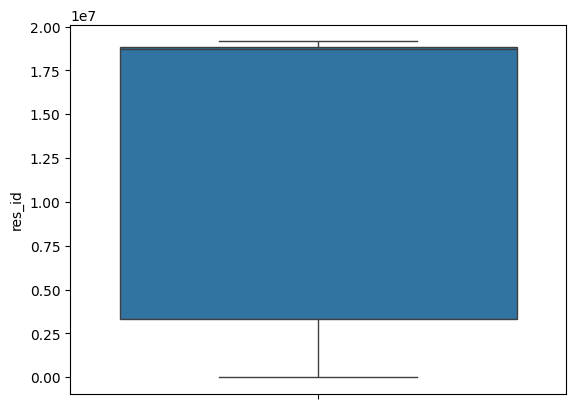

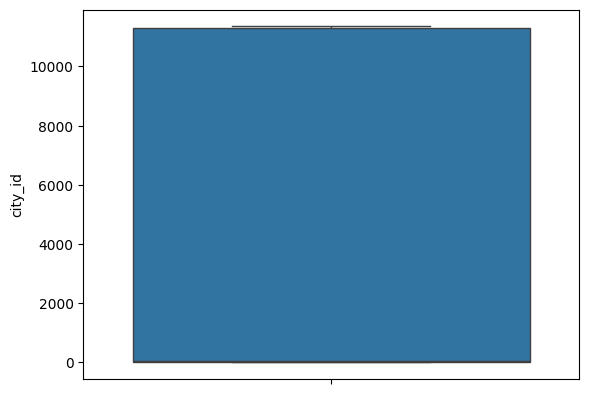

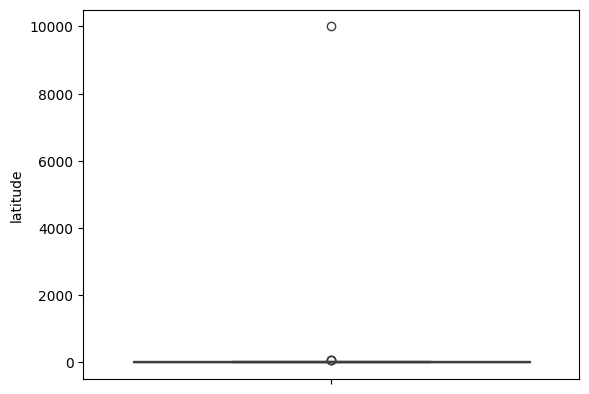

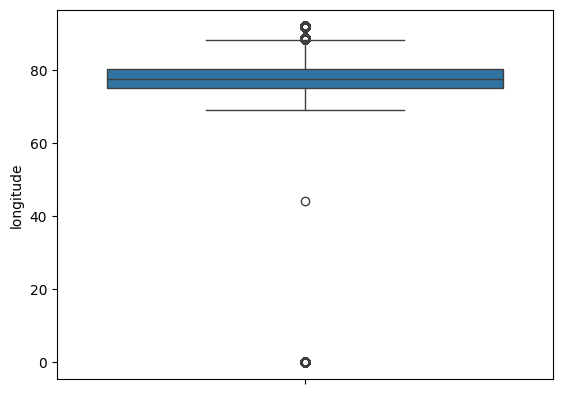

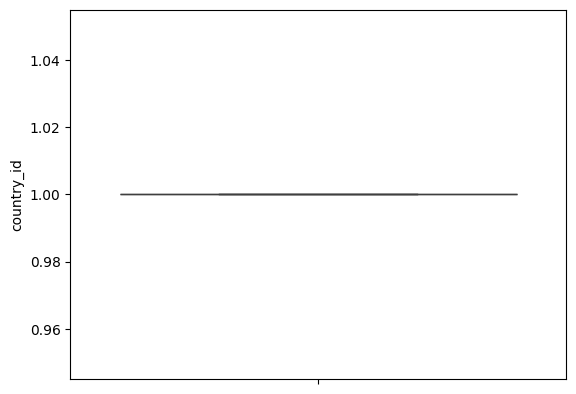

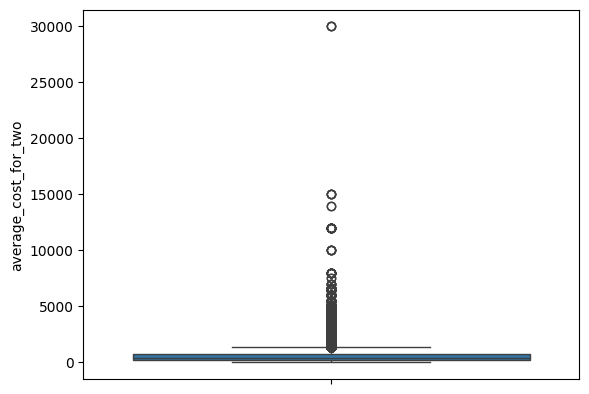

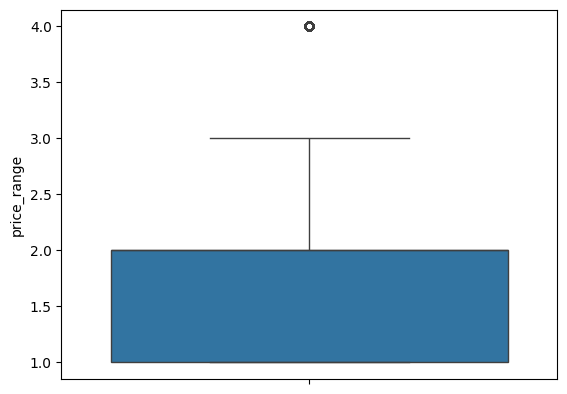

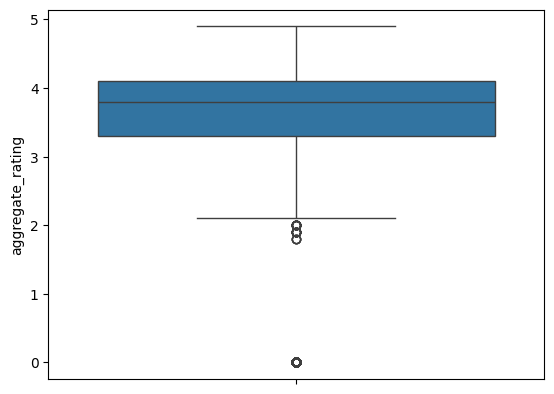

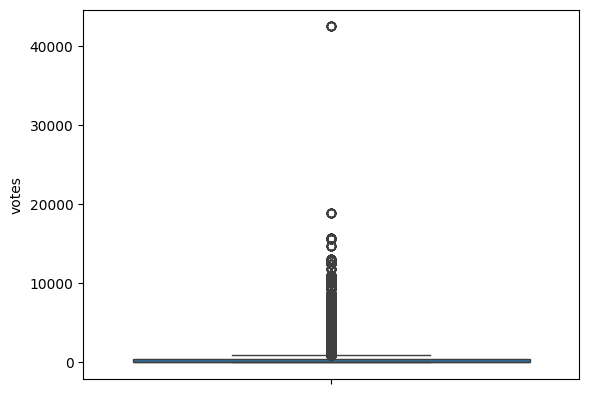

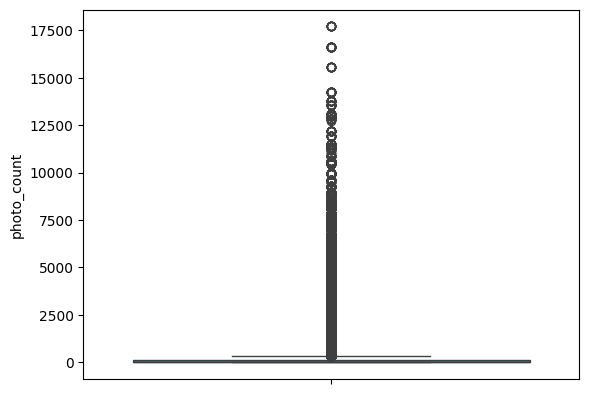

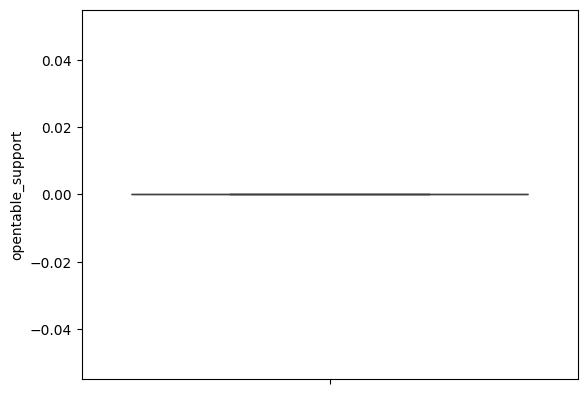

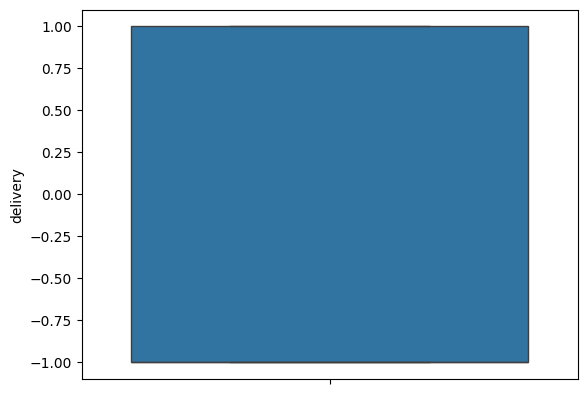

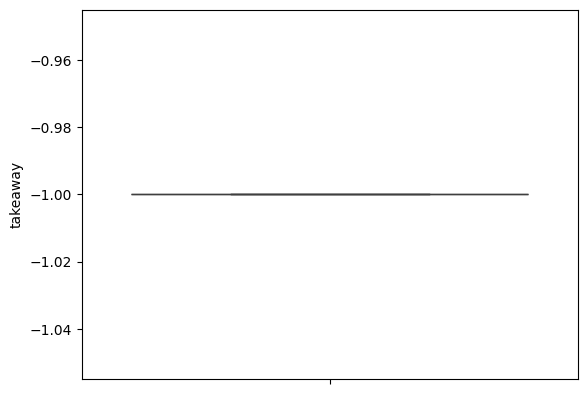

In [51]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(df[i])
    plt.show()

In [52]:
# latitute has extream outlier present in thar\t column
q1 = df['latitude'].quantile(0.25)
q3 = df['latitude'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['latitude'] = df['latitude'].clip(lower=ll, upper=ul)

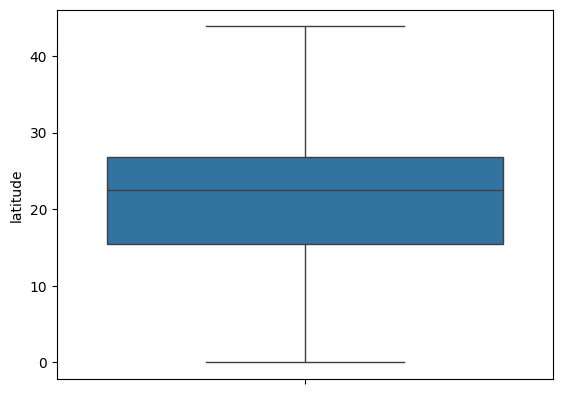

In [53]:
sns.boxplot(df['latitude'])
plt.show()

In [54]:
#capping columns have outlier 
q1 = df['longitude'].quantile(0.25)
q3 = df['longitude'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['longitude'] = df['longitude'].clip(lower=ll, upper=ul)

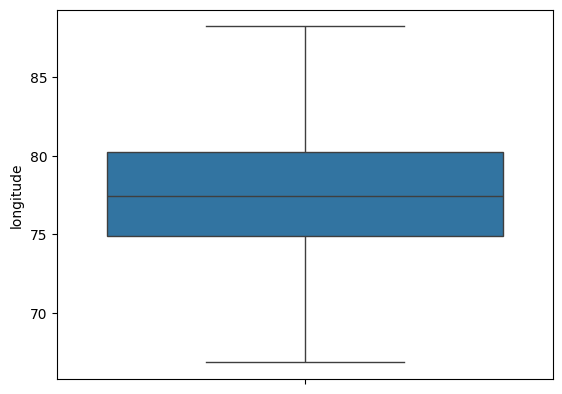

In [55]:
sns.boxplot(df['longitude'])
plt.show()

In [56]:
#capping outlier of average_cost_for_two
q1 = df['average_cost_for_two'].quantile(0.25)
q3 = df['average_cost_for_two'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['average_cost_for_two'] = df['average_cost_for_two'].clip(lower=ll, upper=ul)

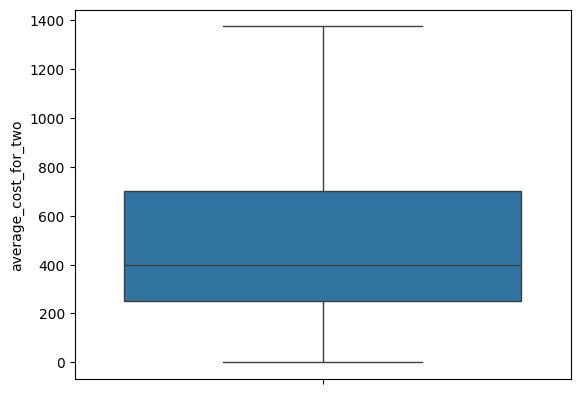

In [57]:
sns.boxplot(df['average_cost_for_two'])
plt.show()

In [58]:
#capping outlier of average_cost_for_two
q1 = df['photo_count'].quantile(0.25)
q3 = df['photo_count'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['photo_count'] = df['photo_count'].clip(lower=ll, upper=ul)


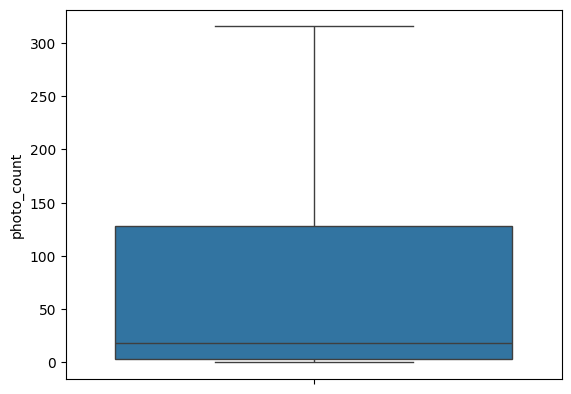

In [59]:
sns.boxplot(df['photo_count'])
plt.show()

In [60]:
# numerical_columns=df.select_dtypes(include=np.number).columns:
#     for i in  numerical_columns:
#         q1=df[i].quantile(0.25)
#         q3=df[i].quantile(0.75)
#         iqr=q3-q1
#         ll=q1-1.5 * iqr
#         ul=q3+1.5 *iqr

In [61]:
q1 = df['price_range'].quantile(0.25)
q3 = df['price_range'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['price_range'] = df['price_range'].clip(lower=ll, upper=ul)

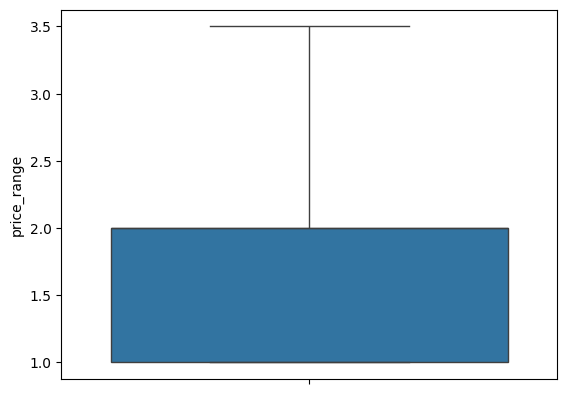

In [62]:
sns.boxplot(df['price_range'])
plt.show()

In [63]:
q1 = df['aggregate_rating'].quantile(0.25)
q3 = df['aggregate_rating'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['aggregate_rating'] = df['aggregate_rating'].clip(lower=ll, upper=ul)

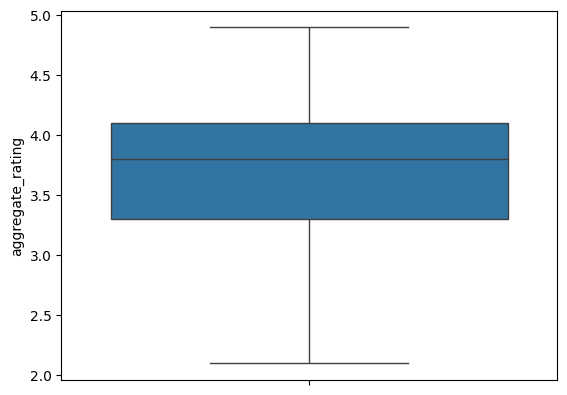

In [64]:
sns.boxplot(df['aggregate_rating'])
plt.show()

In [65]:
q1 = df['votes'].quantile(0.25)
q3 = df['votes'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['votes'] = df['votes'].clip(lower=ll, upper=ul)

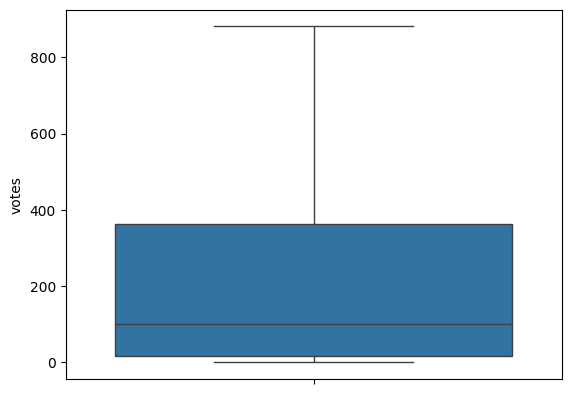

In [66]:
sns.boxplot(df['votes'])
plt.show()

data is not normaly distrubuted

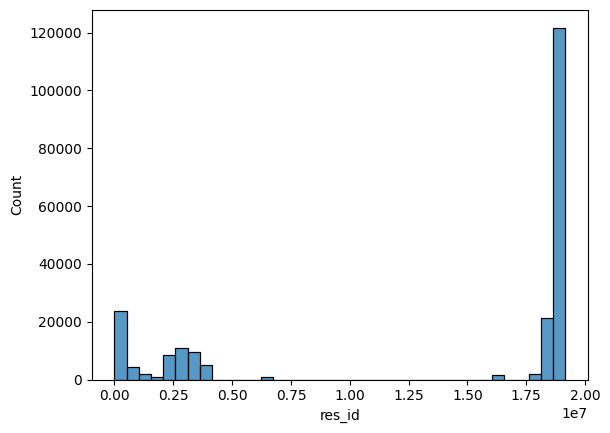

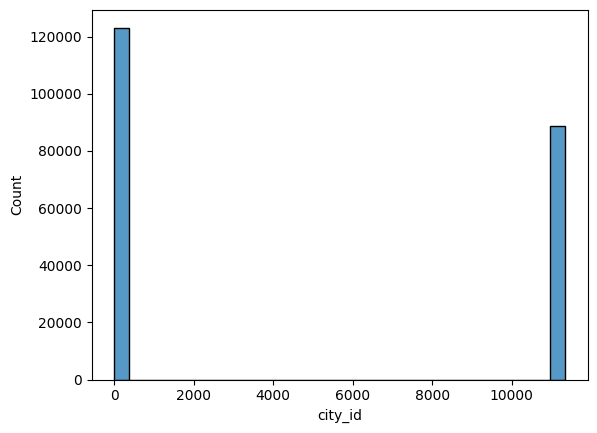

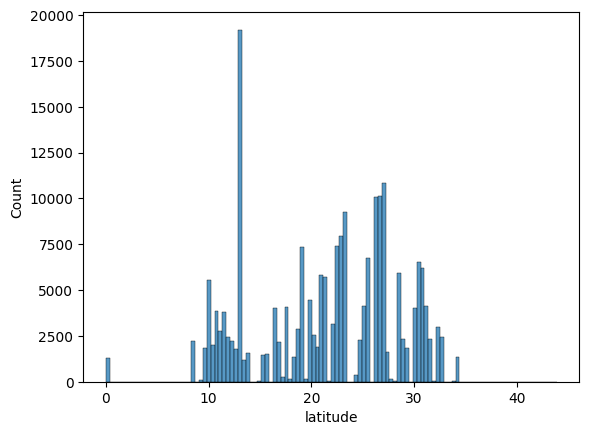

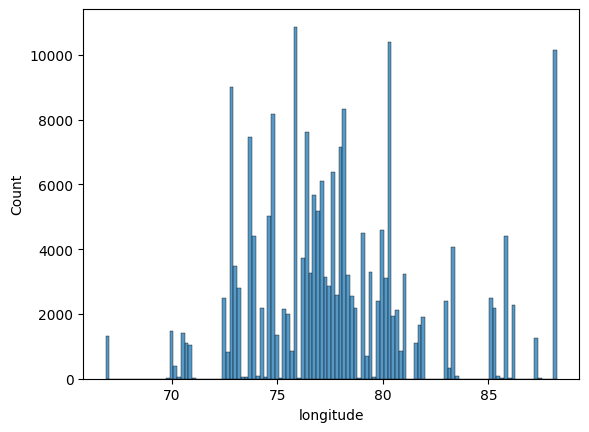

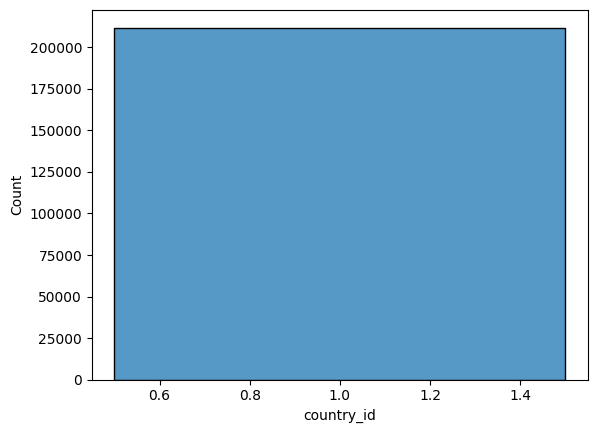

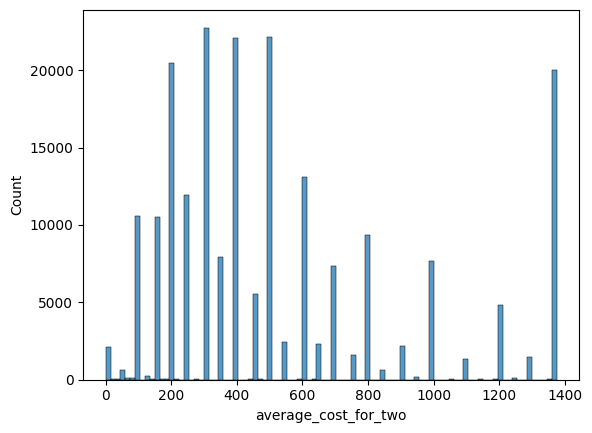

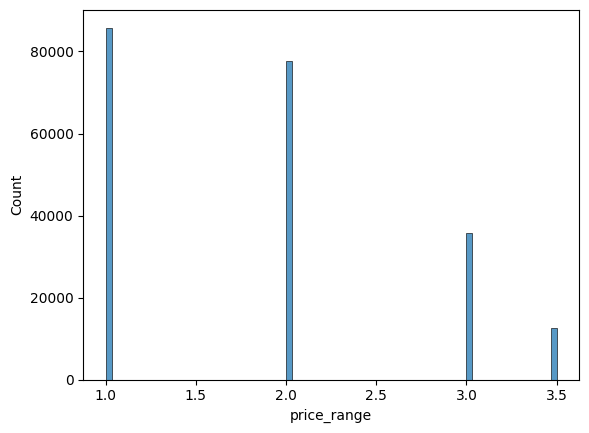

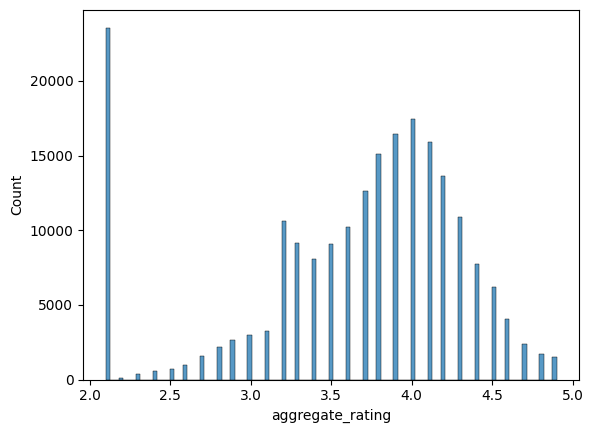

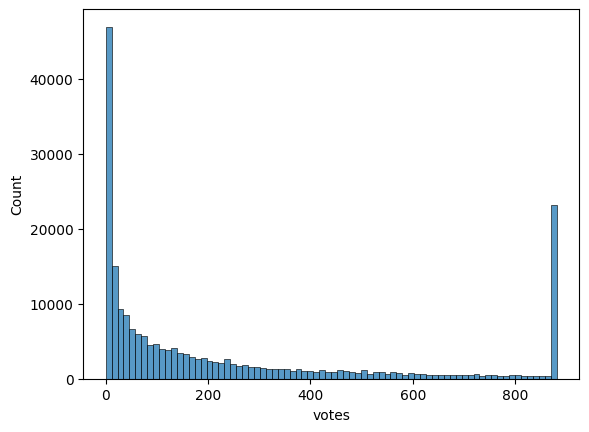

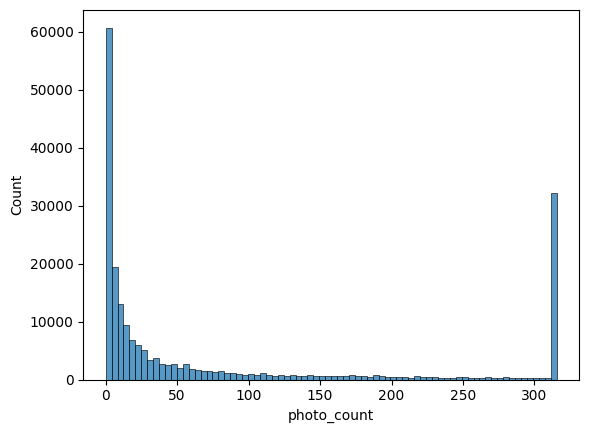

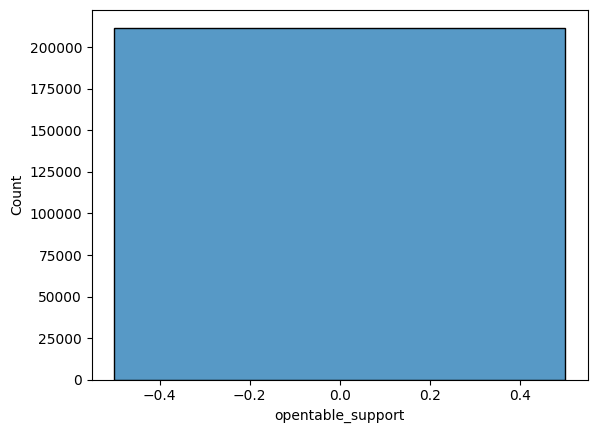

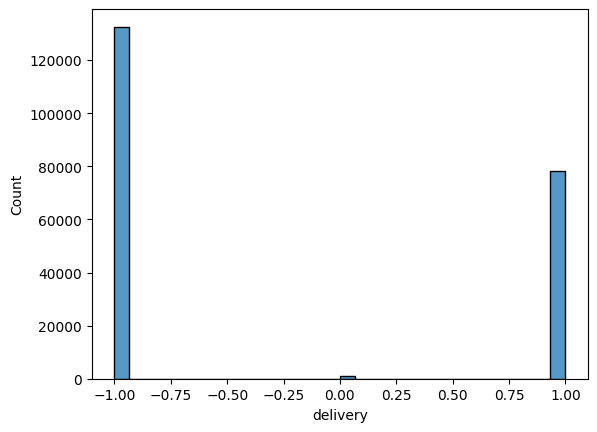

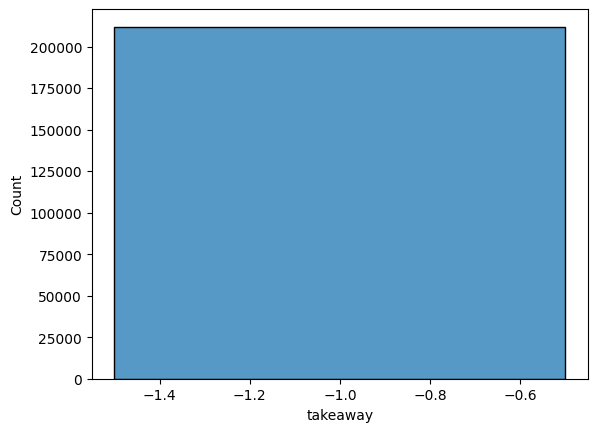

In [67]:
for i in df.select_dtypes(include=np.number).columns:
    sns.histplot(df[i])
    plt.show()

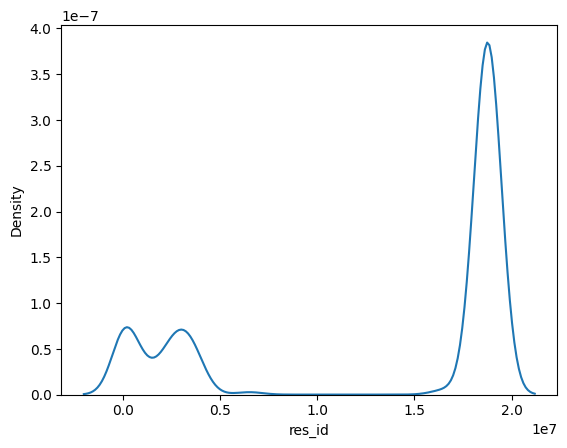

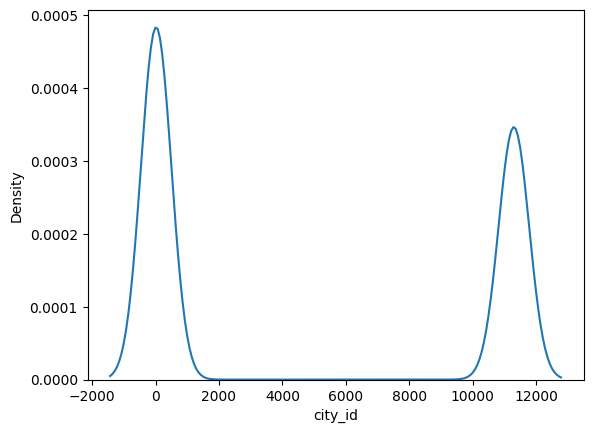

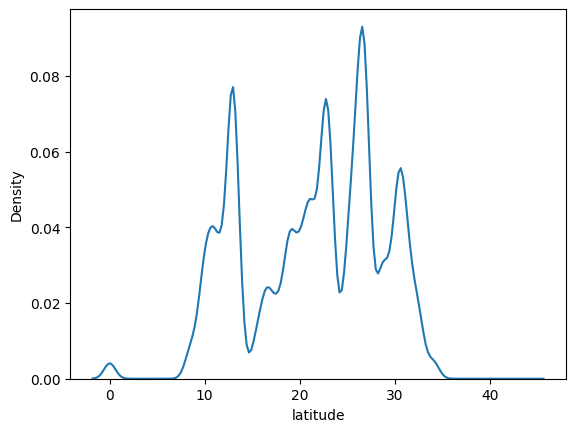

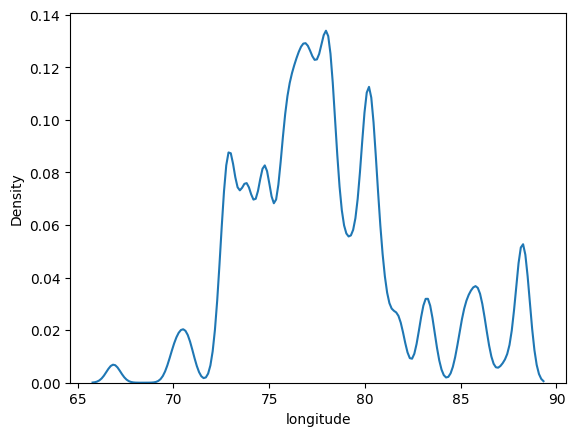

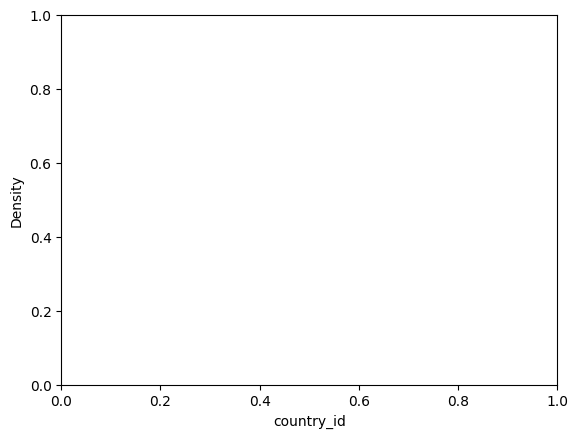

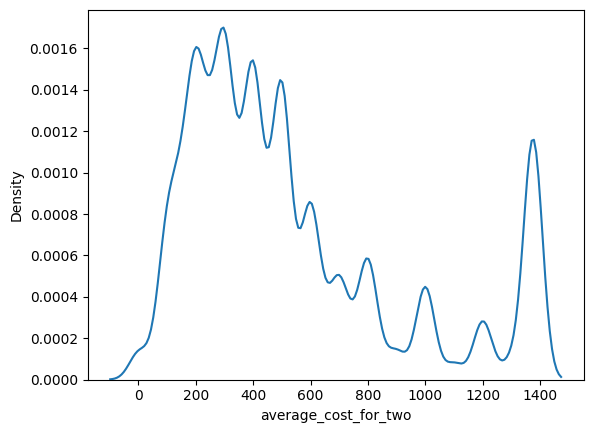

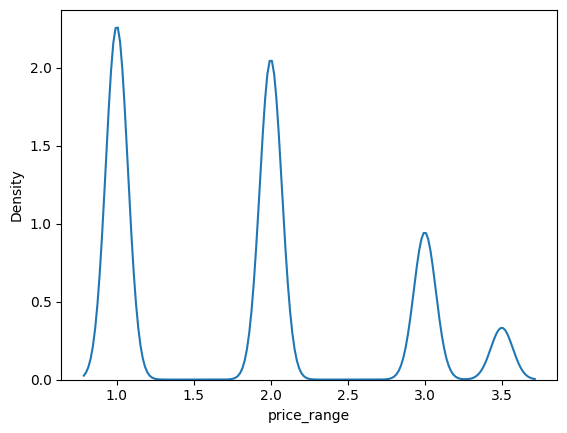

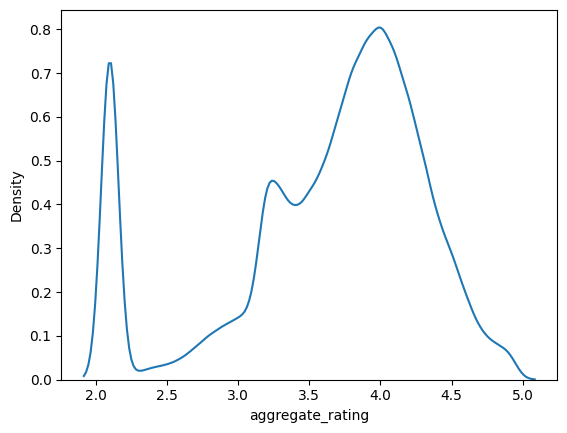

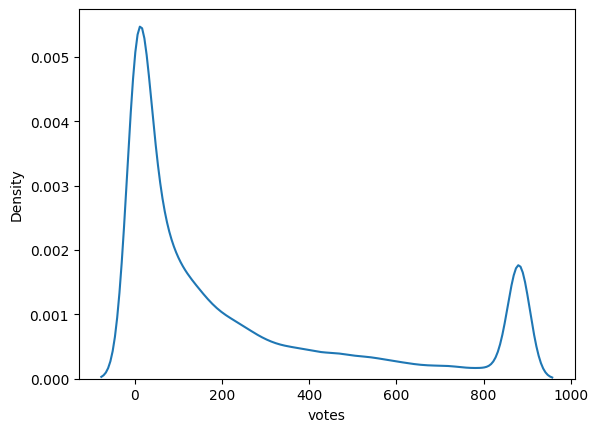

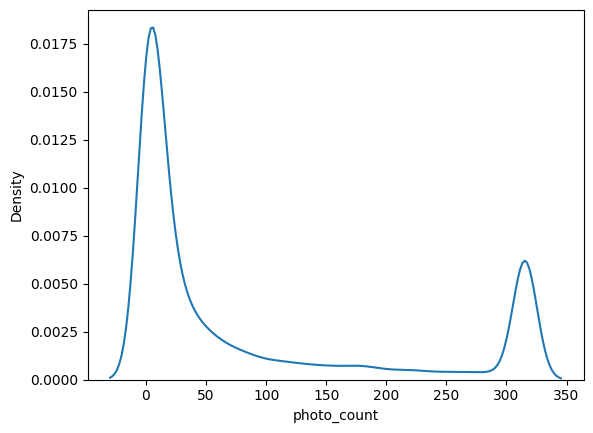

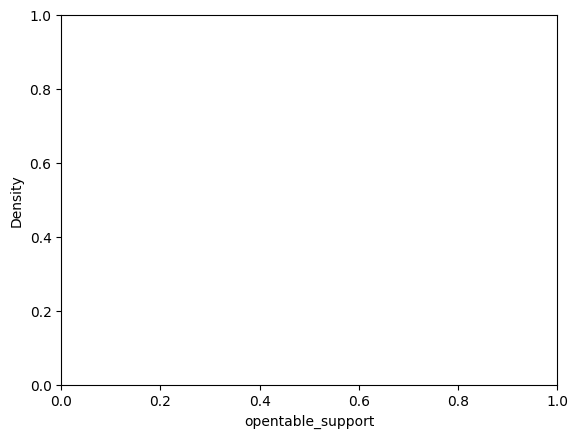

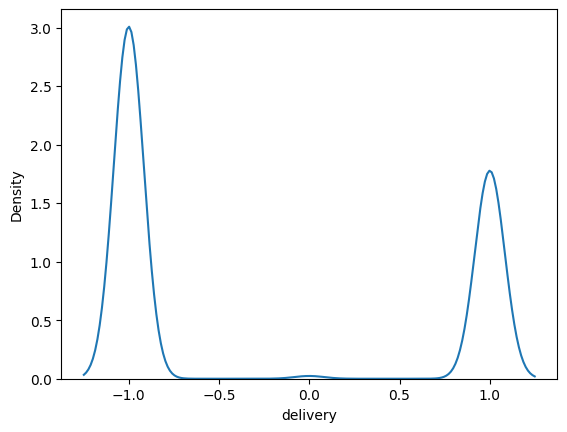

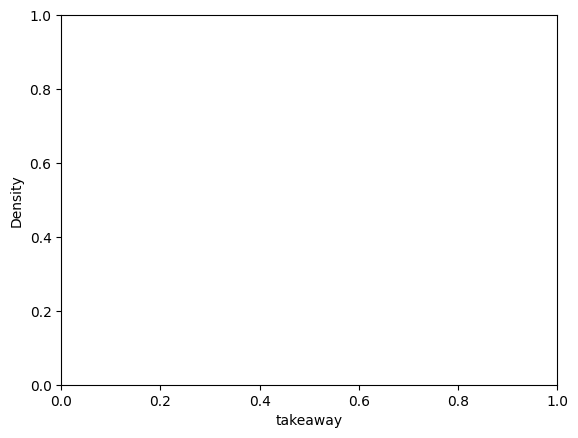

In [68]:
for i in df.select_dtypes(include=np.number).columns:
    sns.kdeplot(df[i])
    plt.show()

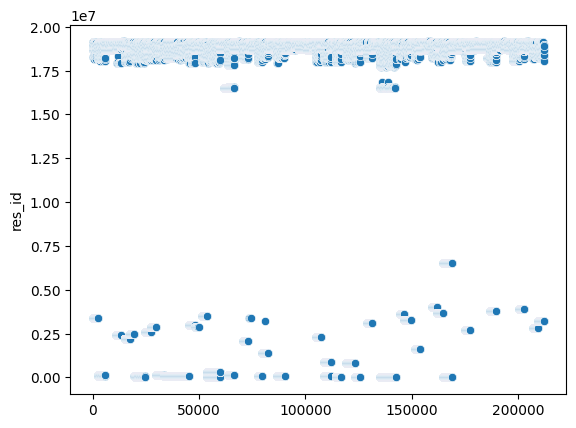

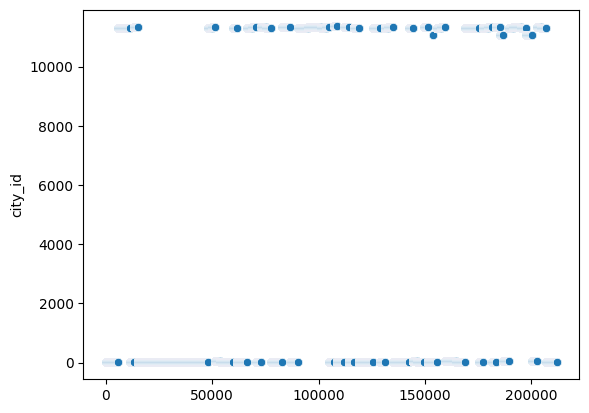

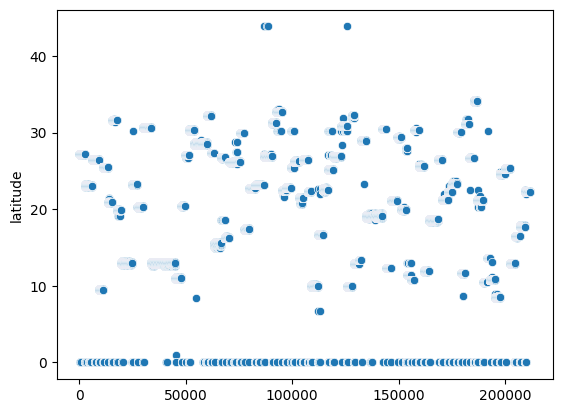

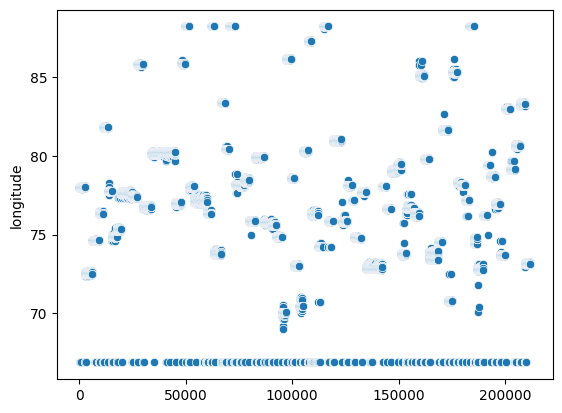

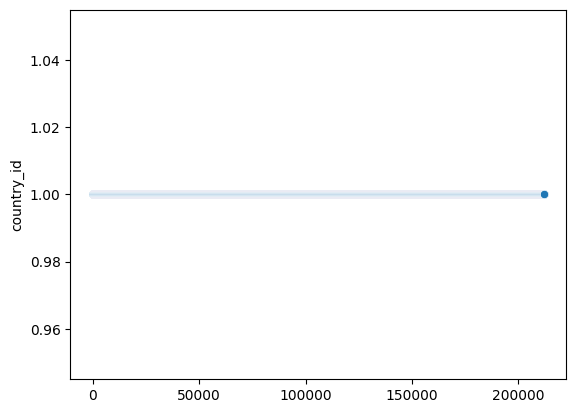

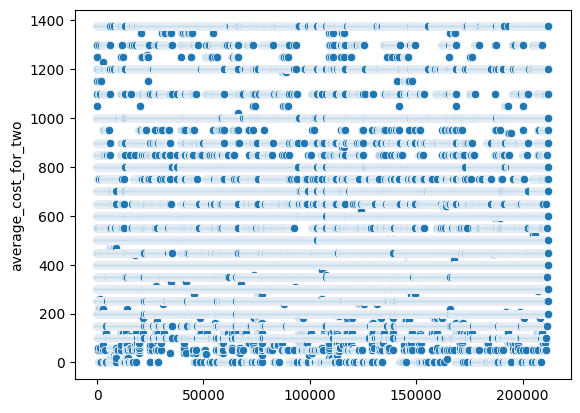

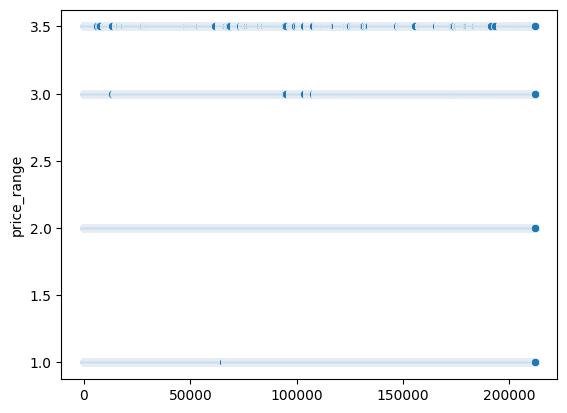

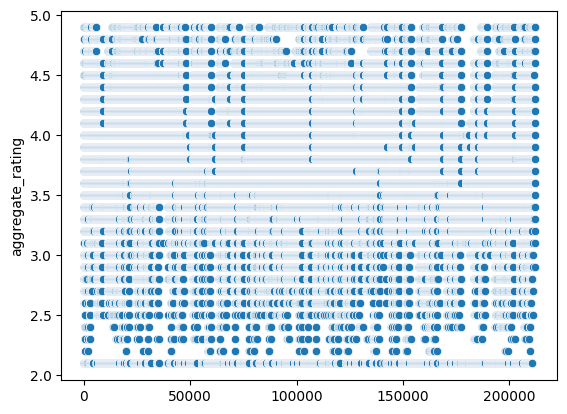

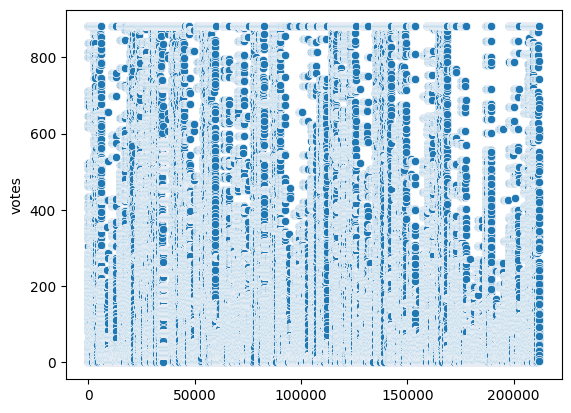

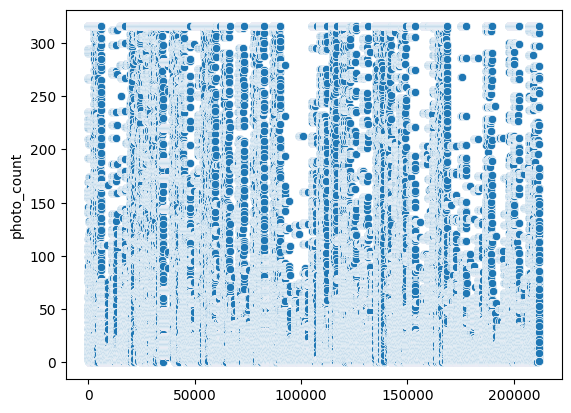

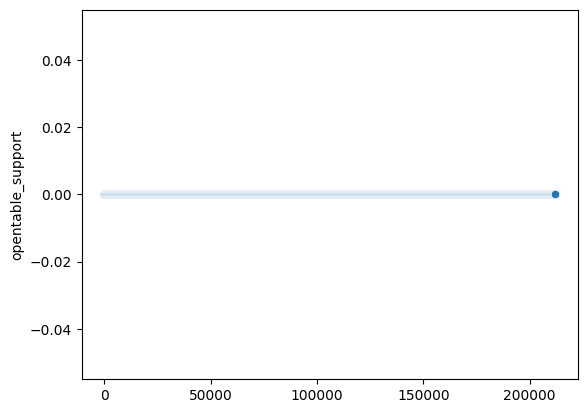

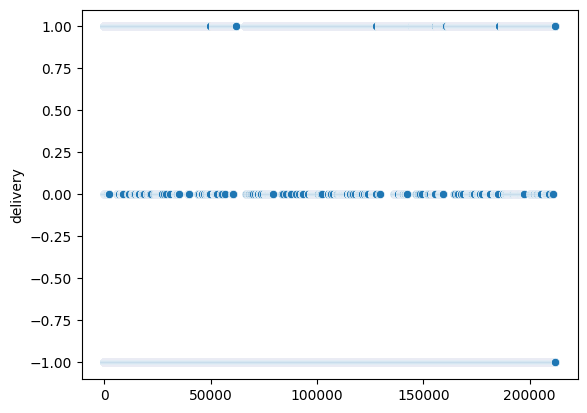

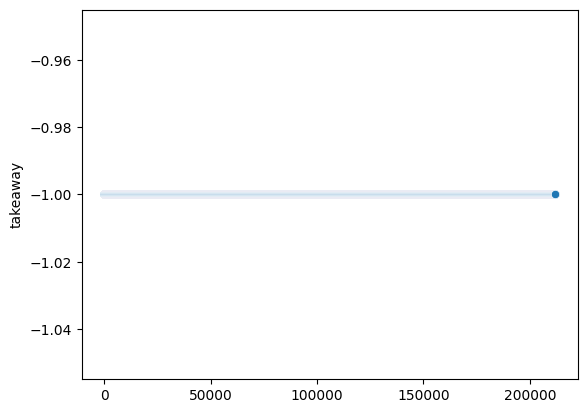

In [69]:
for i in df.select_dtypes(include=np.number).columns:
    sns.scatterplot(df[i])
    plt.show()

scaling data

In [70]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
country_id                int64
locality_verbose         object
cuisines                 object
average_cost_for_two      int64
price_range             float64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count             float64
opentable_support       float64
delivery                  int64
takeaway                  int64
city_locality            object
timing                   object
days                     object
dtype: object

In [71]:
scaler=StandardScaler()
scaler_data = scaler.fit_transform(df[['res_id']])
scaler_data

array([[-1.28033906],
       [-1.28037635],
       [-1.28024849],
       ...,
       [ 0.69637978],
       [-1.30560142],
       [ 0.68314768]], shape=(211944, 1))

In [72]:
scaler1=MinMaxScaler()
scaler_data1 = scaler1.fit_transform(df[['city_id']])
scaler_data1

array([[0.00290672],
       [0.00290672],
       [0.00290672],
       ...,
       [0.00273056],
       [0.00273056],
       [0.00273056]], shape=(211944, 1))

In [73]:
scaler2=MinMaxScaler()
scaler_data2 = scaler2.fit_transform(df[['average_cost_for_two']])
scaler_data2

array([[0.50909091],
       [0.43636364],
       [0.21818182],
       ...,
       [0.50909091],
       [0.36363636],
       [0.43636364]], shape=(211944, 1))

In [74]:
scaler2=MinMaxScaler()
scaler_data2 = scaler2.fit_transform(df[['votes']])
scaler_data2

array([[0.92395006],
       [1.        ],
       [0.9091941 ],
       ...,
       [0.12599319],
       [0.14528944],
       [0.10556186]], shape=(211944, 1))

In [75]:
scaler=StandardScaler()
scaler_data = scaler.fit_transform(df[['delivery']])
scaler_data

array([[-0.77174454],
       [-0.77174454],
       [ 1.30257888],
       ...,
       [-0.77174454],
       [ 1.30257888],
       [ 1.30257888]], shape=(211944, 1))

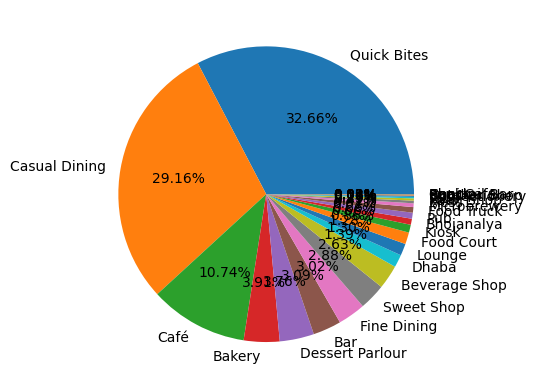

In [76]:
plt.pie(x=df['establishment'].value_counts(),labels=df['establishment'].value_counts().index,autopct='%.2f%%')
plt.show()

average cost for two people across different price rance

In [79]:
average_cost=pd.pivot_table(df,index='price_range',values='average_cost_for_two',aggfunc='mean')

<Figure size 1000x600 with 0 Axes>

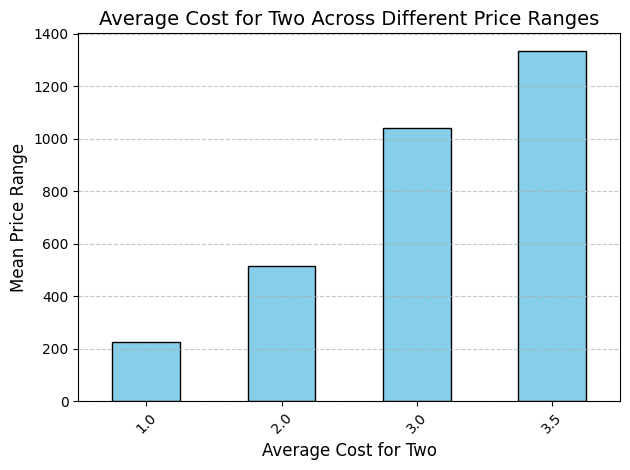

In [80]:
import matplotlib.pyplot as plt

# Bar plot using the pivot table
plt.figure(figsize=(10, 6))
average_cost.plot(kind='bar', legend=False, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Average Cost for Two', fontsize=12)
plt.ylabel('Mean Price Range', fontsize=12)
plt.title('Average Cost for Two Across Different Price Ranges', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


How does the 

what is total number of votes received per cusines types

In [81]:
total_votes_diff_cuisence = pd.pivot_table(df, index='cuisines', values='votes', aggfunc='sum')
total_votes_diff_cuisence

,votes
cuisines,
Afghan,74
"Afghan, American",26
"Afghan, Arabian, BBQ, Beverages, Biryani, Maharashtrian",0
"Afghan, Arabian, BBQ, Beverages, Burger",0
"Afghan, Arabian, Biryani",0
...,...
"Wraps, Sandwich, Pizza, BBQ",0
"Wraps, Sandwich, Pizza, Bakery",455
"Wraps, Sandwich, Rolls, Fast Food, Burger",0


4. which locality highest rated number of restaurant

In [ ]:
highest_rated_locality = pd.pivot_table(df, index='city_locality', values='aggregate_rating', aggfunc='mean')
highest_rating=highest_rated_locality.sort_values(by='aggregate_rating',ascending=True)
highest_rating


what is the most common price range in each city

In [82]:
pd.pivot_table(df,index='city',values="price_range",aggfunc='mean')

,price_range
city,
Agra,1.925057
Ahmedabad,2.197660
Ajmer,1.462618
Alappuzha,1.556101
Allahabad,2.224113
Amravati,1.123650
Amritsar,1.795745
Aurangabad,1.777239
Bangalore,2.255281


In [83]:
most_common_price_range=pd.pivot_table(df,index='city',values='price_range',aggfunc=lambda x:x.mode().iloc[0])
most_common_price_range

,price_range
city,
Agra,1.0
Ahmedabad,2.0
Ajmer,1.0
Alappuzha,1.0
Allahabad,2.0
Amravati,1.0
Amritsar,2.0
Aurangabad,2.0
Bangalore,3.0


6.How many restaurant offers takeway vs only dine-in?

In [89]:
df = df.reset_index()
dine_in = pd.pivot_table(df, index='name', values=['opentable_support','takeway'], aggfunc='count')

KeyError: 'takeway'

7. what is the distribution of restaurant establishment type across locality

In [91]:
aurangabad_df = df[df['city'] == 'Aurangabad']
dine_in = pd.pivot_table(aurangabad_df, index='locality', columns='establishment',values='name', aggfunc='count',fill_value=0)
dine_in

establishment,Bakery,Bar,Beverage Shop,Bhojanalya,Café,Casual Dining,Confectionery,Dessert Parlour,Dhaba,Fine Dining,Food Court,Food Truck,Kiosk,Lounge,Paan Shop,Pub,Quick Bites,Sweet Shop
locality,,,,,,,,,,,,,,,,,,
Akashwani,0,0,2,0,20,31,0,14,0,0,0,1,0,5,0,0,5,0
"Ambassador Ajanta, CIDCO",0,0,0,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0
Anand Nagar,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
CIDCO,21,3,14,3,75,208,0,39,3,0,0,5,3,0,10,0,296,9
Chikalthana,3,0,2,0,5,26,1,2,0,0,1,0,0,0,0,0,17,1
Delhi Gate Area,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
Gadia Vihar,8,0,5,0,9,50,0,5,0,0,0,1,1,4,0,0,31,0
Gulmandi,0,0,3,0,0,15,0,2,0,0,0,0,0,0,0,0,9,15
Harsul,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,3,0


8.How does the average rating differ between between rest that offer delivery vs non-delivery

In [93]:
dine_in = pd.pivot_table(df, index='delivery',columns='establishment', values='aggregate_rating', aggfunc='mean')
dine_in

establishment,Bakery,Bar,Beverage Shop,Bhojanalya,Butcher Shop,Café,Casual Dining,Club,Cocktail Bar,Confectionery,Dessert Parlour,Dhaba,Fine Dining,Food Court,Food Truck,Irani Cafe,Kiosk,Lounge,Mess,Microbrewery,Paan Shop,Pop up,Pub,Quick Bites,Shack,Sweet Shop
delivery,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,3.182375,3.662121,3.093439,2.663699,3.194444,3.566638,3.693008,3.594463,4.259259,2.593061,3.407865,3.104433,3.890380,3.091876,3.132405,3.150000,3.050888,3.840573,3.028571,4.445603,2.748657,2.566667,3.949327,3.446270,2.719231,3.284001
0,3.341667,4.414773,3.687879,2.100000,NaN,3.790164,3.643515,NaN,NaN,2.600000,3.784906,2.333333,3.488889,3.258824,2.560000,NaN,3.250000,3.700000,3.040000,NaN,4.600000,NaN,4.400000,3.408571,NaN,3.075000
1,3.504515,4.089660,3.670704,3.285277,3.473077,3.884630,3.906513,3.433333,3.120000,2.991228,3.862705,3.619557,3.833205,3.494568,3.503865,3.828571,3.482692,3.868994,3.334615,4.430159,3.181319,3.700000,4.146763,3.774861,3.161111,3.638768
